<img src="mioti.png" style="height: 100px">
<center style="color:#888">Data Science in IoT<br/>Asignatura: Predictive Analytics</center>

# Worksheet S1: Introducción a las series Temporales

## Caso práctico: Análisis de los Alquileres de Bicicletas en Chicago


## 0. Objetivo

<img src="bicicletas_chicago.jpg" style="float:right; height: 250px"></img>
Para comenzar a trabajar con las series temporales vamos a utilizar el siguiente caso práctico:

La ciudad de Chicago cuenta con una red de alquileres de bicicletas y tiene un problema con su servicio, ya que más de un ** 20% ** de las estaciones se encuentra sin bicicletas cuando un usuario se acerca a alquilar una de ellas.

Nuestro objetivo es explorar y entender la demanda de bicicletas, para conocer mejor el problema e intentar solucionarlo.

## 1. Preparar el contexto

Como paso previo, cargamos las librerías que serán necesarias en nuestro estudio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Definimos las variables para determinar el tamaño de las gráficas
fig_size = (18,6)
fig_size_subplot = (14,7)

## 2. Obtener los datos

Esta vez va a ser fácil, vamos a importar los datos de un fichero csv, a través de la función **read_csv** que nos proporciona la librería de Pandas.

In [2]:
data_path = 'hour_chicago.csv'
df_datos = pd.read_csv(data_path)

A continuación, comprobamos **qué hemos cargado**. Utilizando las funciones *info(), describe()* y *head()* podemos hacer un primer análisis de los datos cargados. Veamos que contiene nuestro dataset de partida:

In [3]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date_str    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  casual      17379 non-null  int64  
 12  registered  17379 non-null  int64  
 13  cnt         17379 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 1.9+ MB


In [4]:
df_datos.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
df_datos.head(24)

,date_str,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,0.24,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,0.22,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,0.22,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,0.24,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,0.24,0.75,0.0000,0,1,1
5,2011-01-01,1,0,1,5,0,6,0,0.24,0.75,0.0896,0,1,1
6,2011-01-01,1,0,1,6,0,6,0,0.22,0.80,0.0000,2,0,2
7,2011-01-01,1,0,1,7,0,6,0,0.20,0.86,0.0000,1,2,3
8,2011-01-01,1,0,1,8,0,6,0,0.24,0.75,0.0000,1,7,8
9,2011-01-01,1,0,1,9,0,6,0,0.32,0.76,0.0000,8,6,14


Este dataset tiene información a nivel día y hora desde el 1 de Enero del 2011 y el 31 de Diciembre 2012, de varias variables:
- número de bicicletas alquiladas ('cnt'), que a su vez está compuesto por la suma de los campos 'registered' y 'causal' (usuarios registrados y esporádicos).
- temperatura, humedad y velocidad del viento.

**P: ¿Qué tipo de datos tenemos en nuestro dataset: cross-sectional, time series o panel data?**

Time series data

**P: ¿Qué necesitaríamos para que fuese cross-sectional, time series o panel data?**

cross-sectional: coger un instantanea en el tiempo de una muestra (junto con otras fuentes)

panel data: sin filtrar el dataframe original (junto con otras fuents)

## 3. Pretratado de los datos

Al trabajar con series temporales, no debemos olvidar que una de nuestras variables va a ser el **tiempo**. Por este motivo, es muy interesante tener un campo que sea de tipo **datetime**, ya que Pandas interpreta y ofrece múltiples herramientas que facilitan el trabajo con este tipo de datos.

**P: ¿Tenemos alguna variable en nuestro dataset que podamos utilizar como fecha?**

date_str y hr

Vemos que tenemos dos campos que nos pueden resultar de interés, por un lado, la *fecha* (que Pandas ha reconocido como tipo object) y la *hora* (como tipo integer). Para tener nuestra serie temporal por horas, vamos a concatenar ambos campos y a convertirlos a tipo datetime.

In [6]:
df_datos['date_hr'] = (df_datos['date_str'].map(str) + ' ' + df_datos['hr'].map(str) + ':00:00')
df_datos['date_hr'].tail()

17374    2012-12-31 19:00:00
17375    2012-12-31 20:00:00
17376    2012-12-31 21:00:00
17377    2012-12-31 22:00:00
17378    2012-12-31 23:00:00
Name: date_hr, dtype: object

In [7]:
df_datos['date'] = pd.to_datetime(df_datos['date_hr'], format='%Y-%m-%d %H:%M:%S')
df_datos.head()

,date_str,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,date_hr,date
0,2011-01-01,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16,2011-01-01 0:00:00,2011-01-01 00:00:00
1,2011-01-01,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40,2011-01-01 1:00:00,2011-01-01 01:00:00
2,2011-01-01,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32,2011-01-01 2:00:00,2011-01-01 02:00:00
3,2011-01-01,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13,2011-01-01 3:00:00,2011-01-01 03:00:00
4,2011-01-01,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1,2011-01-01 4:00:00,2011-01-01 04:00:00


In [8]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_str    17379 non-null  object        
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   temp        17379 non-null  float64       
 9   hum         17379 non-null  float64       
 10  windspeed   17379 non-null  float64       
 11  casual      17379 non-null  int64         
 12  registered  17379 non-null  int64         
 13  cnt         17379 non-null  int64         
 14  date_hr     17379 non-null  object        
 15  date        17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1), 

Otra recomendación a tener en cuenta cuando trabajamos con series temporales, es **indexar** nuestro dataframe por nuestra variable **tiempo**.

In [9]:
df_datos.index = df_datos['date']
df_datos.head()

,date_str,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt,date_hr,date
date,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16,2011-01-01 0:00:00,2011-01-01 00:00:00
2011-01-01 01:00:00,2011-01-01,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40,2011-01-01 1:00:00,2011-01-01 01:00:00
2011-01-01 02:00:00,2011-01-01,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32,2011-01-01 2:00:00,2011-01-01 02:00:00
2011-01-01 03:00:00,2011-01-01,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13,2011-01-01 3:00:00,2011-01-01 03:00:00
2011-01-01 04:00:00,2011-01-01,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1,2011-01-01 4:00:00,2011-01-01 04:00:00


**Selección de la serie temporal para el análisis**

Vamos a quedarnos con una única serie temporal de las que disponemos en el dataset. Centraremos nuestro análisis en la variable *cnt*, que nos indicaba el número de alquileres de bicicletas (suma de usuarios registrados y esporádicos).

Creamos un nuevo dataframe que sólo contenga las variables *tiempo* y *cnt*.

In [10]:
df_TimeSeriesData = pd.DataFrame(df_datos['cnt'])
df_TimeSeriesData.head()

,cnt
date,
2011-01-01 00:00:00,16
2011-01-01 01:00:00,40
2011-01-01 02:00:00,32
2011-01-01 03:00:00,13
2011-01-01 04:00:00,1


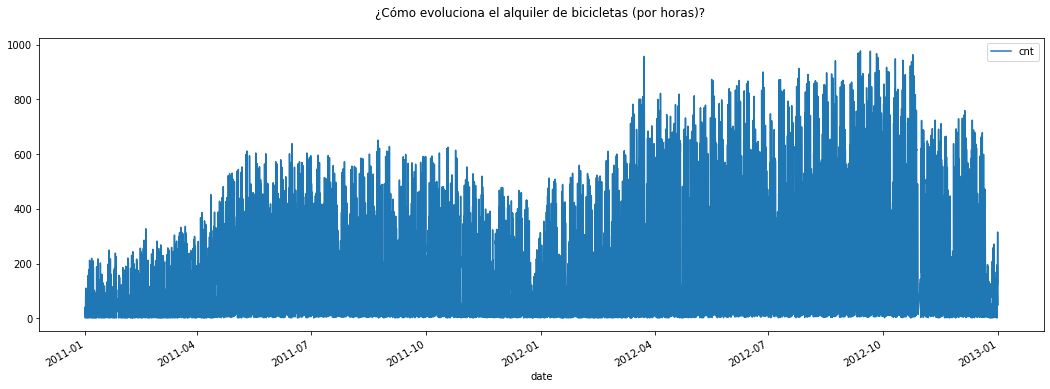

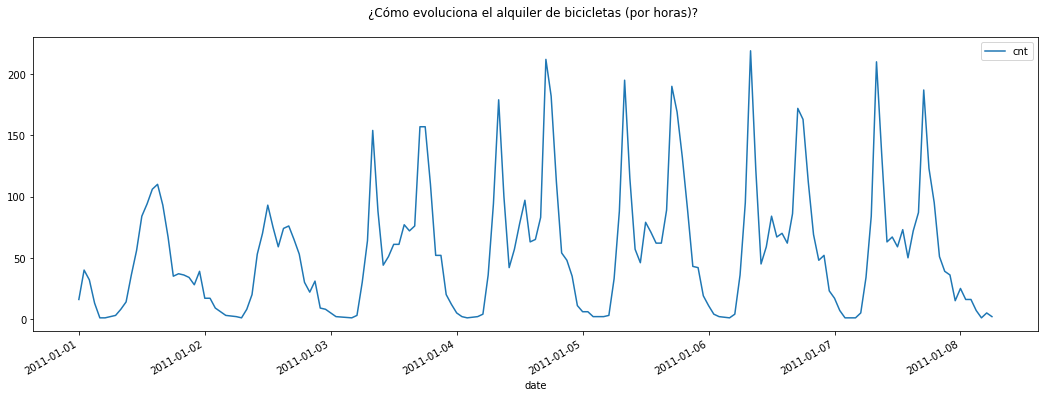

In [11]:
## Visualizamos nuestra serie temporal
df_TimeSeriesData.plot(figsize = fig_size,\
                       title = '¿Cómo evoluciona el alquiler de bicicletas (por horas)? \n')

## Hacemos un zoom sobre unos cuantos días para apreciar mejor el comportamiento
df_TimeSeriesData[:(24*7)].plot(figsize = fig_size,\
                       title = '¿Cómo evoluciona el alquiler de bicicletas (por horas)? \n')

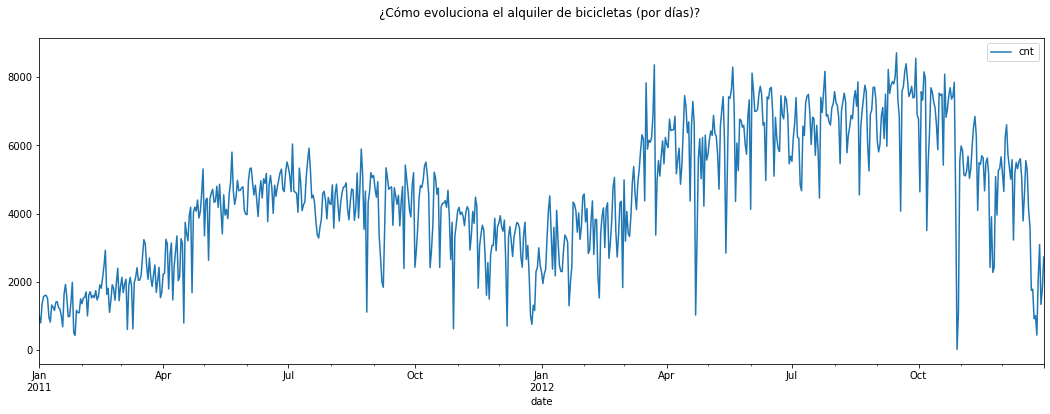

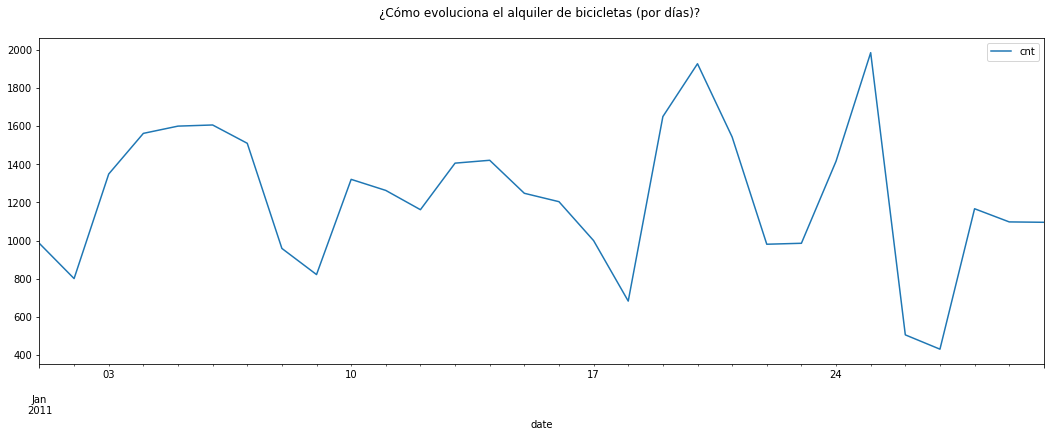

In [12]:
## Agregamos la serie por días y volvemos a representarla
df_TimeSeriesData_daily = df_TimeSeriesData.resample('d').sum()
df_TimeSeriesData_daily.plot(figsize = fig_size,\
                             title = '¿Cómo evoluciona el alquiler de bicicletas (por días)? \n')

## Hacemos un zoom sobre los primeros 30 días del año para apreciar mejor el comportamiento
df_TimeSeriesData_daily[:30].plot(figsize = fig_size,\
                       title = '¿Cómo evoluciona el alquiler de bicicletas (por días)? \n')

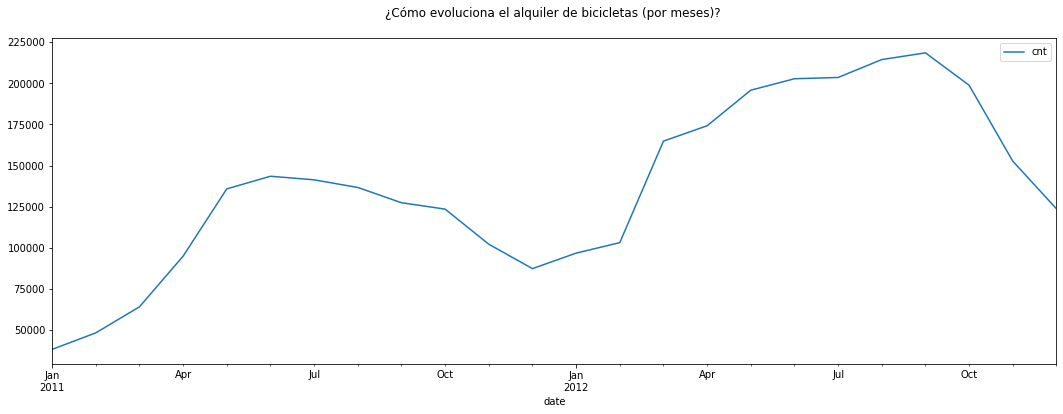

In [13]:
## Agregamos la serie por meses y volvemos a representarla
df_TimeSeriesData_monthly = df_TimeSeriesData.resample('m').sum()
df_TimeSeriesData_monthly.plot(figsize = fig_size,\
                             title = '¿Cómo evoluciona el alquiler de bicicletas (por meses)? \n')

## 4. Componentes de una serie temporal

**P: ¿Cuál es la componente principal de nuestra serie temporal?**

Estacionalidad diaria / semanal y otra anual y tendencia positiva

**P: ¿Se puede analizar la estacionalidad de una serie? ¿y la tendencia? ¿Cómo?**

Con ventanas deslizantes para la estacionalidad

Restar valores consecutivos para la tendencia (Regresion)

Si podemos analizar las distintas componentes de una serie, podremos tratarlas por separado y medir los efectos que tienen sobre la serie completa. Por eso, es muy importante poder detectar y calcular cada una de estas componentes en el análisis de series temporales, pues nos ayudará a la hora de hacer nuestras previsiones.

### ¿Cómo eliminar las componentes de estacionalidad de una serie?

Para responder a esta pregunta vamos a partir de nuestra serie agregada por meses. En este caso, lo que tenemos es **estacionalidad mensual**.

In [14]:
df_TimeSeriesData_monthly.head()

,cnt
date,
2011-01-31,38189
2011-02-28,48215
2011-03-31,64045
2011-04-30,94870
2011-05-31,135821


Eliminar la estacionalidad se consigue fácilmente con el uso de **medias móviles**. Nuestra media móvil será a mes y con un periodo de 12 meses. En Pandas, es muy fácil si combinamos las funciones *rolling()* y *mean()*.

In [15]:
df_monthly_moving_average = df_TimeSeriesData_monthly.rolling(12).mean()
df_monthly_moving_average

,cnt
date,
2011-01-31,NaN
2011-02-28,NaN
2011-03-31,NaN
2011-04-30,NaN
2011-05-31,NaN
2011-06-30,NaN
2011-07-31,NaN
2011-08-31,NaN
2011-09-30,NaN


**P: ¿Es normal que aparezcan los primeros meses sin valor de media móvil?**

porque no tiene 12 valores para hacer la media movil.

Para responder a esta pregunta, vamos a representar nuestra serie temporal y el cálculo que acabamos de hacer de media móvil.

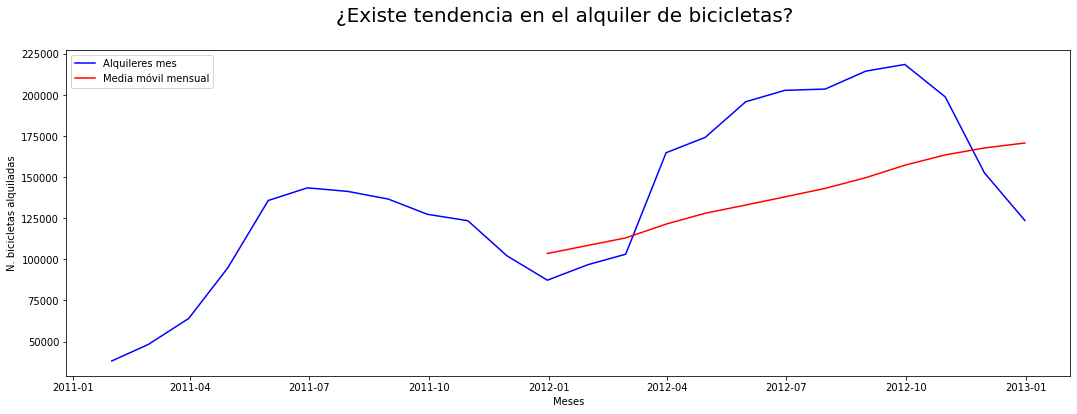

In [16]:
plt.figure(figsize=fig_size)
plt.plot(df_TimeSeriesData_monthly,color='b')
plt.plot(df_monthly_moving_average,color='r')
plt.title('¿Existe tendencia en el alquiler de bicicletas? \n',fontsize= 20)
plt.xlabel('Meses')
plt.ylabel('N. bicicletas alquiladas')
plt.legend(['Alquileres mes','Media móvil mensual'], loc=2)

Si somos capaces de extraer la estacionalidad, podemos ver el efecto que tiene en la serie.

### Nuestro primer cálculo intuitivo de estacionalidad: utilización de medias móviles

Vamos a profundizar un poco más en el cálculo de la estacionalidad a través del uso de las media móviles. Para ello vamos a calcular e incluir en nuestro dataframe los denominados **coeficientes de estacionalidad**, que nos aportan información sobre cómo afecta esta componente a la serie.

In [17]:
## Incluimos el cálculo anterior en nuestro dataframe
df_TimeSeriesData_monthly['cnt_media_movil_12']=df_TimeSeriesData_monthly.rolling(12).mean()

In [18]:
## Cálculo de los coeficientes de estacionalidad
df_TimeSeriesData_monthly['coef_estacionalidad']=df_TimeSeriesData_monthly['cnt'] \
                                                /df_TimeSeriesData_monthly['cnt_media_movil_12']
df_TimeSeriesData_monthly[-12:]

,cnt,cnt_media_movil_12,coef_estacionalidad
date,,,
2012-01-31,96744,108471.500000,0.891884
2012-02-29,103137,113048.333333,0.912327
2012-03-31,164875,121450.833333,1.357545
2012-04-30,174224,128063.666667,1.360448
2012-05-31,195865,133067.333333,1.471924
2012-06-30,202830,138010.500000,1.469671
2012-07-31,203607,143199.333333,1.421843
2012-08-31,214503,149683.666667,1.433042
2012-09-30,218573,157279.916667,1.389707


**P: ¿Qué significa ese coeficiente de estacionalidad?**

por enciam de 1 positiova , por debajo de 1 negativa

En este caso, nos indica el porcentaje que se alquila más o menos con respecto a un mes estándar.

Para entender mejor cómo afecta la estacionalidad al número de alquileres de bicicletas, podemos convertir ese índice y representarlo.

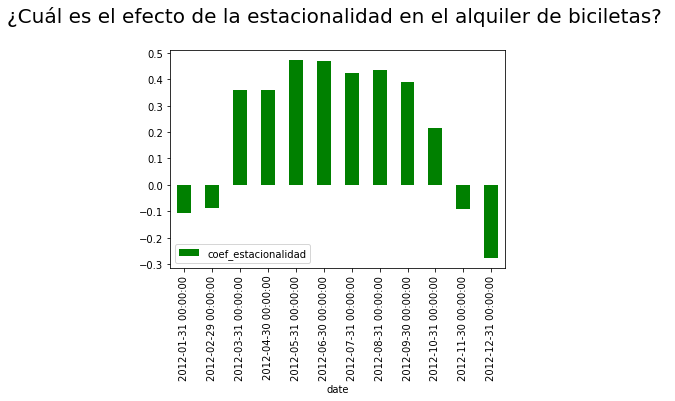

In [19]:
(df_TimeSeriesData_monthly['coef_estacionalidad'][-12:]-1).plot(kind='bar',color='green')
plt.title('¿Cuál es el efecto de la estacionalidad en el alquiler de biciletas? \n',fontsize= 20)
plt.legend()

### ¿Cómo eliminar la componente de tendencia de una serie?

Como ya hemos visto, además de componente estacionario, nuestra serie tiene también tendencia. 

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10203da90>,
      dtype=object)

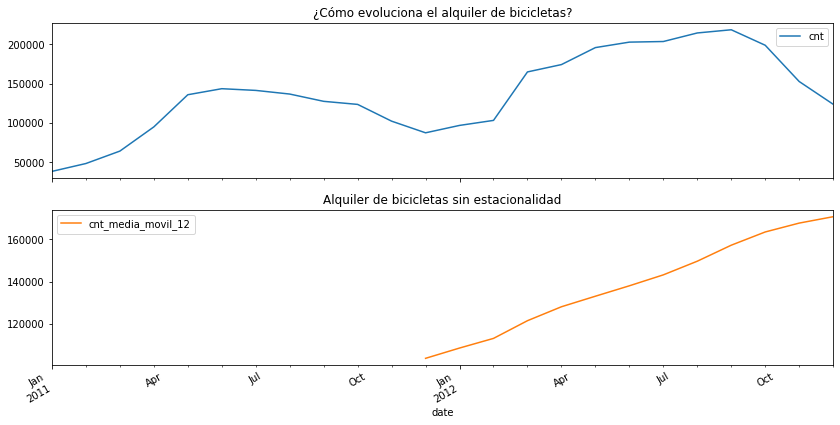

In [24]:
# Representamos la serie con y sin estacionalidad
df_TimeSeriesData_monthly.iloc[:,:2].plot(subplots = True,
                                          title = ['¿Cómo evoluciona el alquiler de bicicletas?',\
                                                   'Alquiler de bicicletas sin estacionalidad'],
                                          figsize = fig_size_subplot)


### Nuestro primer cálculo de tendencia

Al igual que la estacionalidad, eliminar la **tendencia** es muy sencillo, simplemente debemos calcular la **diferencia con el dato anterior**.

In [21]:
## Eliminamos la tendencia de la serie
df_TimeSeriesData_monthly['cnt_mm12_shift'] = df_TimeSeriesData_monthly['cnt_media_movil_12'].shift(1)
df_TimeSeriesData_monthly['cnt_mm12_sin_tendencia'] = df_TimeSeriesData_monthly['cnt_media_movil_12'] - \
                                                      df_TimeSeriesData_monthly['cnt_media_movil_12'].shift(1)
df_TimeSeriesData_monthly.tail(13)

,cnt,cnt_media_movil_12,coef_estacionalidad,cnt_mm12_shift,cnt_mm12_sin_tendencia
date,,,,,
2011-12-31,87323,103591.916667,0.842952,NaN,NaN
2012-01-31,96744,108471.500000,0.891884,103591.916667,4879.583333
2012-02-29,103137,113048.333333,0.912327,108471.500000,4576.833333
2012-03-31,164875,121450.833333,1.357545,113048.333333,8402.500000
2012-04-30,174224,128063.666667,1.360448,121450.833333,6612.833333
2012-05-31,195865,133067.333333,1.471924,128063.666667,5003.666667
2012-06-30,202830,138010.500000,1.469671,133067.333333,4943.166667
2012-07-31,203607,143199.333333,1.421843,138010.500000,5188.833333
2012-08-31,214503,149683.666667,1.433042,143199.333333,6484.333333


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matpl

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1177102d0>,
      dtype=object)

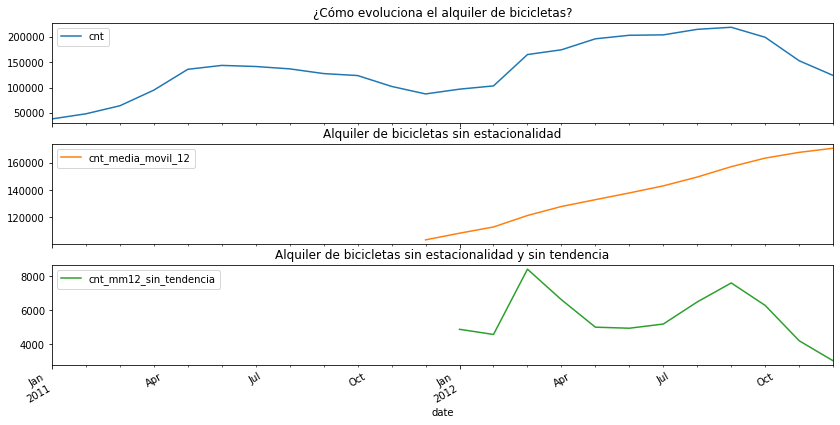

In [22]:
## Representamos la serie temporal, la serie sin estacionalidad y la serie sin tendencia 
df_TimeSeriesData_monthly.loc[:,['cnt','cnt_media_movil_12','cnt_mm12_sin_tendencia']].plot(subplots = True,
                                          title = ['¿Cómo evoluciona el alquiler de bicicletas?',\
                                                   'Alquiler de bicicletas sin estacionalidad', \
                                                   'Alquiler de bicicletas sin estacionalidad y sin tendencia'],
                                          figsize = fig_size_subplot)